### HMM Week!

In [1]:
from IPython.display import Audio

In [2]:
Audio('sounds/apple/apple01.wav')

In [8]:
import pandas_datareader as pdr

In [9]:
#!pip install pandas_datareader
#!pip install lxml

In [10]:
amzn = pdr.get_data_yahoo('AMZN', start = '2010-01-01')

In [11]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2698 entries, 2010-01-04 to 2020-09-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2698 non-null   float64
 1   Low        2698 non-null   float64
 2   Open       2698 non-null   float64
 3   Close      2698 non-null   float64
 4   Volume     2698 non-null   int64  
 5   Adj Close  2698 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 147.5 KB


<AxesSubplot:xlabel='Date'>

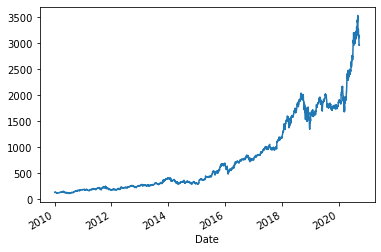

In [12]:
amzn['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

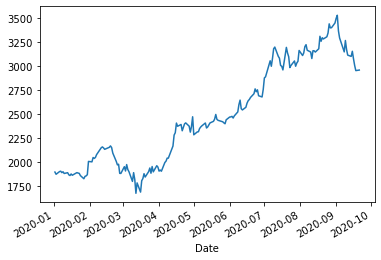

In [14]:
amzn['2020']['Adj Close'].plot()

In [18]:
from hmmlearn import hmm

In [17]:
#!pip install hmmlearn

In [19]:
model = hmm.GaussianHMM(n_components=3)

In [21]:
X = amzn['2020'][['Adj Close']]
model.fit(X)

GaussianHMM(n_components=3)

In [22]:
preds = model.predict(X)

In [25]:
X.shape

(182, 1)

In [30]:
X.values[:4]

array([[1898.01000977],
       [1874.9699707 ],
       [1902.88000488],
       [1906.85998535]])

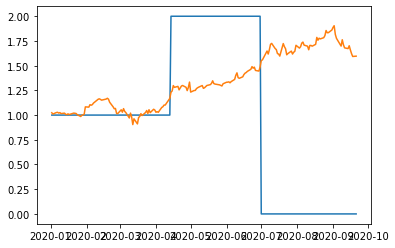

In [35]:
import matplotlib.pyplot as plt
plt.plot(X.index, preds)
plt.plot(X/(X.max() - X.min()))

In [36]:
def beat_the_market(symbol):
    data = pdr.get_data_yahoo(symbol, start = '2019-01-01')
    X = data[['Adj Close']]
    model = hmm.GaussianHMM(n_components = 3)
    model.fit(X)
    preds = model.predict(X)
    plt.plot(X.index, preds)
    plt.plot(X/(X.max() - X.min()))

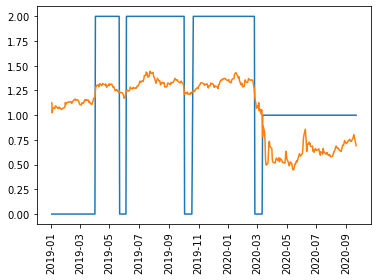

In [39]:
beat_the_market('DAL')
plt.xticks(rotation = 90);

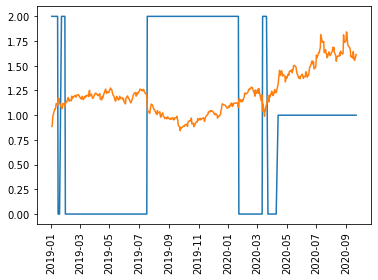

In [40]:
beat_the_market('NFLX')
plt.xticks(rotation = 90);

### Looking at Speech Files

In [41]:
from scipy.io import wavfile

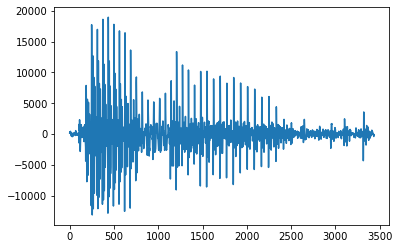

In [62]:
sampling_freq, banana_audio = wavfile.read('sounds/banana/banana01.wav')

plt.plot(banana_audio)

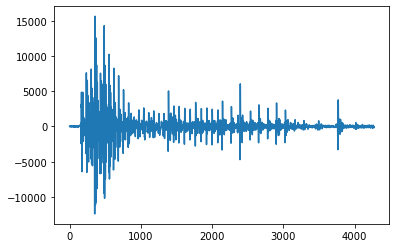

In [66]:
sampling_freq, banana_audio = wavfile.read('sounds/banana/banana05.wav')

plt.plot(banana_audio)

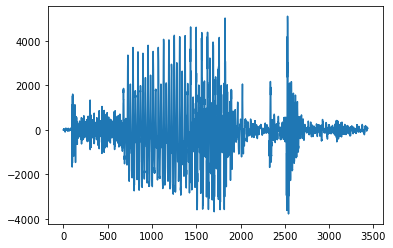

In [68]:
sampling_freq, banana_audio = wavfile.read('sounds/kiwi/kiwi07.wav')

plt.plot(banana_audio)

In [73]:
Audio('sounds/apple/apple05.wav')

In [47]:
#!pip install python_speech_features

In [46]:
import python_speech_features as features

In [48]:
mfcc_feat = features.mfcc(banana_audio)

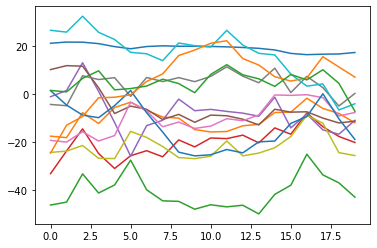

In [50]:
plt.plot(mfcc_feat);

In [51]:
X = mfcc_feat
y = ['banana']

In [52]:
import os

In [53]:
class MakeMarkov:
    def __init__(self, n_components = 3, n_iter = 1000):
        self.n_components = n_components
        self.n_iter = n_iter
        self.model = hmm.GaussianHMM(n_components=self.n_components, 
                                     n_iter = self.n_iter)
        
    def train(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        return self.model.score(X)

In [55]:
import numpy as np
hmm_models = []
for file in os.listdir('sounds/'):
    subfolder = os.path.join('sounds', file)
    if not os.path.isdir(subfolder):
        continue
    label = subfolder[subfolder.rfind('/') + 1:]
    X = np.array([])
    y_words = []
    for filename in [x for x in os.listdir(subfolder)\
                     if x.endswith('.wav')][:-1]:
        filepath = os.path.join(subfolder, filename)
        sampling_freq, audio = wavfile.read(filepath)
        mfcc_features = features.mfcc(audio, sampling_freq)
        if len(X) == 0:
            X = mfcc_features
        else:
            X = np.append(X, mfcc_features, axis = 0)
        y_words.append(label)
        hmm_trainer = MakeMarkov()
        hmm_trainer.train(X)
        hmm_models.append((hmm_trainer, label))
        hmm_trainer = None

In [59]:
hmm_models[:2]

[(<__main__.MakeMarkov at 0x7fca40c3e220>, 'apple'),
 (<__main__.MakeMarkov at 0x7fca40d95640>, 'apple')]

In [57]:
in_files = ['sounds/pineapple/pineapple15.wav',
           'sounds/orange/orange15.wav',
           'sounds/apple/apple15.wav',
           'sounds/kiwi/kiwi15.wav']

In [58]:
for file in in_files:
    samp, audio = wavfile.read(file)
    mfcc_features = features.mfcc(audio, samp)
    max_score = -np.inf
    output_label = None
    for item in hmm_models:
        hmm_model, label = item
        score = hmm_model.score(mfcc_features)
        if score > max_score:
            max_score = score
            output_label = label
    print('True: ', file[file.find('/') + 1:file.rfind('/')])
    print('Predicted: ', output_label)

True:  pineapple
Predicted:  pineapple
True:  orange
Predicted:  orange
True:  apple
Predicted:  apple
True:  kiwi
Predicted:  kiwi
